# Assignment 3
## Due May 14  at 14:00

Please do not chance any provided variable name. Read carefully the instructions in the exercise PDF and in this notebook. Add your solutions at `YOUR CODE HERE` and remove the corresponding `raise NotImplementedError()`.
Before submitting: Please make sure, that your notebook can be executed from top to bottom without an error (Menu -> Kernel -> Restart & Run all). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

## Exercise 2

In [2]:
def get_data(n, seed=42):
    np.random.seed(seed)
    
    X = np.random.uniform(low=0, high=2, size=(n, 1))
    epsilon = np.random.normal(0, 2, (n, 1))
    y = 2 * np.sin(2 * X) + 0.1 * epsilon
    
    return X, y

In [3]:
xs, ys = get_data(100)
xs.shape, ys.shape

((100, 1), (100, 1))

### a)

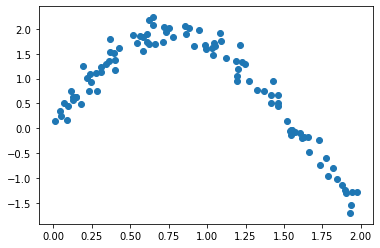

In [4]:
# Create a new figure with new default axis
fig, axis = plt.subplots(1, 1)

# Plot here in axis
plt.scatter(xs,ys)

In [5]:
# PLEASE LEAVE THIS CELL EMPTY

### b)

In [5]:
def create_features(xs, basis='bias'):
    if basis == 'bias':
        return np.hstack([np.ones(xs.shape), xs])
    if basis == 'parte':
        return np.hstack([np.ones(xs.shape), xs, xs**2])
    if basis == 'partg':
        x1 = xs[:,0,np.newaxis]
        x2 = xs[:,1,np.newaxis]
        return np.hstack([np.ones(x1.shape), x1, x1*x1, x2, x2*x2, x1*x2])

In [8]:
f = np.array([[1,2],[1,2],[1,2]])
print(f)
f.sum(axis=-1)

[[1 2]
 [1 2]
 [1 2]]


array([3, 3, 3])

In [15]:
def ridge_regression(xs, ys, lam=1):
    # X = create_features(xs)
    XTX = xs.T @ xs
    temp2 = xs.shape[0] * lam * np.eye(XTX.shape[0])
    A = XTX + temp2
    b = xs.T @ ys
    w = np.linalg.solve(A,b)
    return w

def objective(w, X, Y, lam=1):
    obj = ((Y - (X * w).sum(axis=-1)[:,np.newaxis])**2).mean() + lam * np.linalg.norm(w, ord=1)
    return obj

def lasso_regression(xs, ys, lam=1):
    # Tipp: You can use scipy.optimize.minimize
    # xs = create_features(xs)
    w = np.random.randn(xs.shape[-1])[:,np.newaxis]
    minimizer = minimize(objective, w, (xs, ys, lam), method='BFGS', options={'maxiter':100})
    return minimizer.x[:,np.newaxis]

# X = create_features(xs)
# print(ridge_regression(X,ys,0))
# print(lasso_regression(X, ys, 0))

#Test that they return the same thing when lambda is 0
print(ridge_regression(xs,ys, 0))
print(lasso_regression(xs, ys, 0))


[[0.35058949]]
[[0.35058945]]


In [8]:
# PLEASE LEAVE THIS CELL EMPTY

### c)

$\lambda = \{0.1, 1, 10\}$

Ridge Regression:

In [16]:
lambdas = [0.1, 1, 10]
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

# X = create_features(xs)

for i, lam in enumerate(lambdas):
    # ridge regession
    w = ridge_regression(xs,ys, lam)
    ys_pred = xs @ w
    mse = ((ys - ys_pred)**2).mean()

    ys_pred_per_lambda[i] = ys_pred
    mse_per_lambda[i] = mse
    
print(mse_per_lambda)

[1.5153744995110392, 1.5449118191541356, 1.6347621031184643]


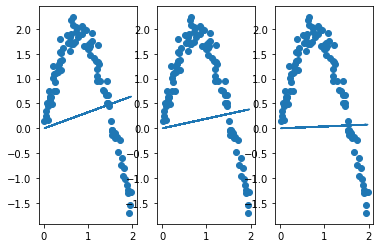

In [17]:
fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    
    # First plot scatters, then the regression line
    plt.scatter(xs,ys)
    plt.plot(xs, ys_pred)

In [11]:
# PLEASE LEAVE THIS CELL EMPTY

Lasso Regression:

[1.5165473344898068, 1.6662881422284395, 1.6662881426704186]


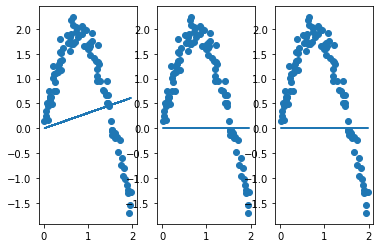

In [18]:
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

for i, lam in enumerate(lambdas):
    # lasso regession
    w = lasso_regression(xs,ys, lam)
    ys_pred = xs @ w
    mse = ((ys - ys_pred)**2).mean()

    ys_pred_per_lambda[i] = ys_pred
    mse_per_lambda[i] = mse 
    
print(mse_per_lambda)


fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    
    # First plot scatters, then the regression line
    plt.scatter(xs,ys)
    plt.plot(xs, ys_pred)

In [13]:
# PLEASE LEAVE THIS CELL EMPTY

### d)

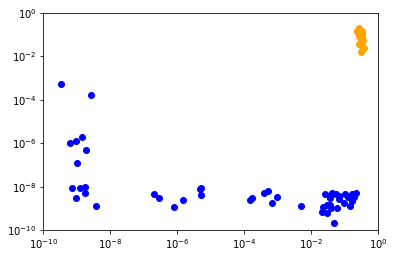

In [19]:
datasets = [(np.c_[xs, xs**2], ys) for xs, ys in
            (get_data(100, seed=seed) for seed in range(0, 100, 2))]

# Calculate the weights for ridge and lasso on all datasets.
#print(datasets[0][0])
ridge_w = np.array([ridge_regression(xs, ys) for xs, ys in datasets])
lasso_w = np.array([lasso_regression(xs, ys) for xs, ys in datasets])
# print(len(ridge_w), ridge_w[0])

fig, axis = plt.subplots(1, 1)
# Scatter plot the absolute weight values
# use logarithmic axis scales and 
# set appropriate axis limits

plt.sca(axis)

plt.scatter(np.abs(ridge_w[:,0]), np.abs(ridge_w[:,1]), c='orange')
plt.scatter(np.abs(lasso_w[:,0]), np.abs(lasso_w[:,1]), c='blue')

plt.xlim((0.0000000001,1))
plt.ylim((0.0000000001,1))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
# PLEASE LEAVE THIS CELL EMPTY

### e)

Ridge regression

In [20]:
X = create_features(xs, basis='parte')

lambdas = [0.001, 0.01, 0.1, 1, 10]
ridge_ys_pred = [None, None, None, None, None]
ridge_mse = [None, None, None, None, None]

for i, lam in enumerate(lambdas):
    # ridge regession
    ridge_we = ridge_regression(X, ys, lam)
    ys_pred = X @ ridge_we
    mse = ((ys - ys_pred)**2).mean()

    ridge_ys_pred[i] = ys_pred
    ridge_mse[i] = mse

# print(ridge_mse)
best_ind = np.argmin(ridge_mse)

print(f'best lambda: {lambdas[best_ind]}')
print(f'mse: {ridge_mse[best_ind]}')

best lambda: 0.001
mse: 0.04813881791110305


In [17]:
# PLEASE LEAVE THIS CELL EMPTY

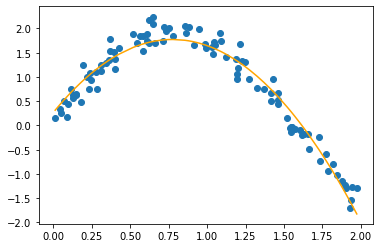

In [21]:
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
xs_s, ys_s = zip(*sorted(zip(xs, ridge_ys_pred[best_ind])))
plt.sca(axis)
plt.scatter(xs, ys)
plt.plot(xs_s, ys_s, c='orange')
plt.show()

In [19]:
# PLEASE LEAVE THIS CELL EMPTY

Linear regresion

In [22]:
# YOUR CODE HERE
ridge_we = ridge_regression(X, ys, lam=0)
ys_pred = X @ ridge_we
mse = ((ys - ys_pred)**2).mean()

print(mse)

0.046979083181786195


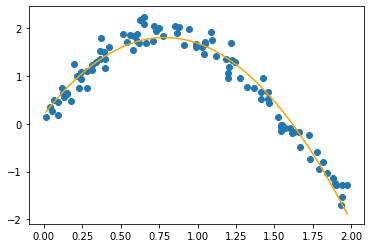

In [23]:
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
xs_s, ys_s = zip(*sorted(zip(xs, ys_pred)))
plt.sca(axis)
plt.scatter(xs, ys)
plt.plot(xs_s, ys_s, c='orange')
plt.show()

In [22]:
# PLEASE LEAVE THIS CELL EMPTY

### f)

In [24]:
xs_test, ys_test = get_data(20, seed=420)

In [25]:
# Setup Omega, Omega_test, and lambdas
# YOUR CODE HERE
lambdas = [0.001, 0.01, 0.1]
ridge_ys_pred = [None, None, None]
lasso_ys_pred = [None, None, None]
ridge_mse = [None, None, None]
lasso_mse = [None, None, None]

X_test = create_features(xs_test, basis='parte')

for i, lam in enumerate(lambdas):
    # ridge
    ridge_wf = ridge_regression(X, ys, lam)
    ys_pred_test = X_test @ ridge_wf
    mse = ((ys_test - ys_pred_test)**2).mean()

    ridge_ys_pred[i] = ys_pred_test
    ridge_mse[i] = mse

    #lasso
    lasso_wf = lasso_regression(X, ys, lam)
    ys_pred_test = X_test @ lasso_wf
    mse = ((ys_test - ys_pred_test)**2).mean()

    lasso_ys_pred[i] = ys_pred_test
    lasso_mse[i] = mse

ridge_best_ind = np.argmin(ridge_mse)
lasso_best_ind = np.argmin(lasso_mse)

print(f'Ridge:\n all errors: {ridge_mse}\n best lambda: {lambdas[ridge_best_ind]} (err: {ridge_mse[ridge_best_ind]})')
print(f'Lasso all errors: {lasso_mse}\n best lambda: {lambdas[lasso_best_ind]} (err: {lasso_mse[lasso_best_ind]})\n')

better = 'ridge' if ridge_mse[ridge_best_ind] <= lasso_mse[lasso_best_ind] else 'lasso'
print(f'Better method is {better} regression.')

Ridge:
 all errors: [0.037885921461156824, 0.07265758139290994, 0.26494962994433185]
 best lambda: 0.001 (err: 0.037885921461156824)
Lasso all errors: [0.038393853945733226, 0.038334779128788896, 0.16064692252223248]
 best lambda: 0.01 (err: 0.038334779128788896)

Better method is ridge regression.


In [25]:
# PLEASE LEAVE THIS CELL EMPTY

### g)

In [26]:
xs = np.random.uniform(0,2, (100, 2))
ys = 2 * (xs[:, 0]**2) + xs[:, 1] + 1 + 0.1 * np.random.normal(0, 1, 100)

In [27]:
X=create_features(xs, basis='partg')

lambdas = [0.001, 0.01, 0.1, 1, 10]
ridge_ys_pred = [None, None, None, None, None]
ridge_mse = [None, None, None, None, None]

for i, lam in enumerate(lambdas):
    # ridge regession
    ridge_wg = ridge_regression(X, ys, lam)
    ys_pred = X @ ridge_wg
    mse = ((ys - ys_pred)**2).mean()

    ridge_ys_pred[i] = ys_pred
    ridge_mse[i] = mse

print(ridge_mse)

[0.01011010807358723, 0.013656001374647606, 0.053414029329309415, 0.6121800593430617, 7.94134145812218]


In [28]:
# PLEASE LEAVE THIS CELL EMPTY

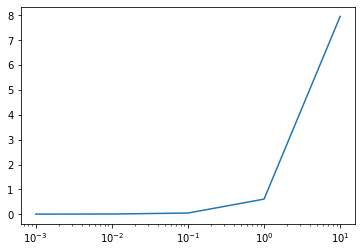

In [29]:
fig, axis = plt.subplots(1, 1)
lambdas = [0.001, 0.01, 0.1, 1, 10] 

# Plot line of mse as a function of lambda
plt.sca(axis)
plt.plot(lambdas, ridge_mse)
plt.xscale('log')
plt.show()

In [30]:
# PLEASE LEAVE THIS CELL EMPTY